In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get Data

In [7]:
df = pd.read_csv('datasets/banana.csv')
df.head()

,attr1,attr2,clase
0,0.431573,0.592162,-1
1,0.421647,0.330900,1
2,0.707009,0.443339,-1
3,0.648684,0.810578,-1
4,0.264226,0.211079,1


In [11]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(df.drop('clase', axis=1))
scaled_features = scaler.transform(df.drop('clase', axis=1))
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,attr1,attr2
0,-0.519068,0.939300
1,-0.577815,-0.524500
2,1.111090,0.105474
3,0.765896,2.163041
4,-1.509505,-1.195833


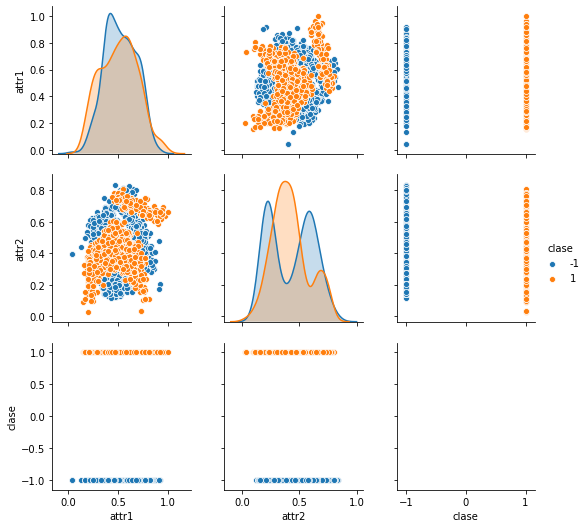

In [20]:
sns.pairplot(df, hue='clase')


### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['clase'], train_size = 0.7)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [38]:
pred = knn.predict(X_test)
pred

array([-1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1

### Prediction and Evaluation

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [40]:
print(confusion_matrix(y_test, pred))

[[193  33]
 [ 25 147]]


In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.89      0.85      0.87       226
           1       0.82      0.85      0.84       172

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.86      0.85      0.85       398



### Choosing K Value

In [62]:
accuracy_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, df['clase'], cv=10)
    accuracy_rate.append(score.mean())

In [63]:
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, df_feat, df['clase'], cv=10)
    error_rate.append(1-score.mean())

In [64]:
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

(19,)


Text(0, 0.5, 'Error rate')

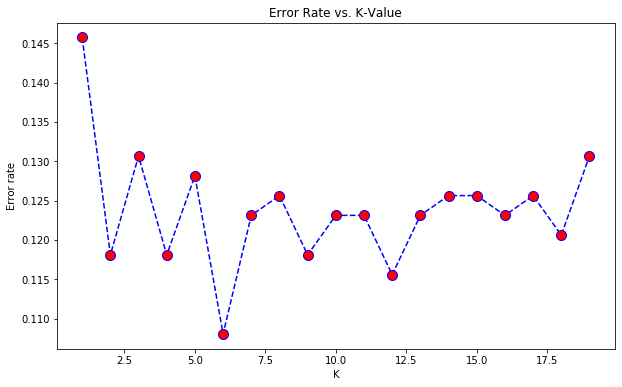

In [69]:
plt.figure(figsize=(10,6))
print(np.shape(error_rate))
plt.plot(range(1, 20), error_rate, color='blue',
         linestyle = 'dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title("Error Rate vs. K-Value")
plt.xlabel("K")
plt.ylabel("Error rate")

##### Like we can see, with K = 6 the error rate just tends to hover 0.110-0.05. Lets retrain the model with that and check the classification report.

In [77]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("With K=1")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

With K=1


[[193  33]
 [ 25 147]]


              precision    recall  f1-score   support

          -1       0.89      0.85      0.87       226
           1       0.82      0.85      0.84       172

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.86      0.85      0.85       398



In [75]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("With K=6")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

With K=6


[[211  15]
 [ 28 144]]


              precision    recall  f1-score   support

          -1       0.88      0.93      0.91       226
           1       0.91      0.84      0.87       172

    accuracy                           0.89       398
   macro avg       0.89      0.89      0.89       398
weighted avg       0.89      0.89      0.89       398

